In [31]:
#Create a series of Stochastic Equations and relatively plot
class StochasticEquations:

    def Vasicek(r0, alpha, beta, sigma, T, N, M):
        """
        Generate interest rate paths using Hull White model:

        Input:
        r0 (float): Interest Rate initial value
        alpha (float): Speed of mean reversion
        beta (float): Long-Term mean level
        sigma (float): Volatility
        T (float) : Time horizon in year (to express a semester use 0.5, a quarter 0.3, ecc...)
        N (int): Number of steps between the time horizon (daily)
        M (int): Number of simulated paths

        Output:
        np.ndarray: Simulated interest rate paths
        """ 
        dt = T/N
        rates = np.zeros((N+1,M))
        rates[0] = r0

        for t in range(1,N+1):
            z = np.random.normal(size=M)
            rates[t] = rates[t-1] + alpha*(beta - rates[t-1])*dt + sigma*np.sqrt(dt)*z
        return rates
    
    def PlotVmodel(rates):
        plt.figure(figsize=(12,6))
        for i in range(M):
            plt.plot(rates[:,i],color = "blue", alpha=0.1)

        plt.title("Vasicek Model - Interest rate Paths")
        plt.xlabel('Time Steps')
        plt.ylabel('Interest rate')
        plt.show()


    def hull_white(a, sigma, r0, T, N, M):
        """
        Generate interest rate paths using Hull White model:

        Input:
        a (float): Mean Reversion Speed
        sigma (float): Volatility
        r0 (float): Interest Rate initial value
        T (float) : Time horizon in year (to express a semester use 0.5, a quarter 0.3, ecc...)
        N (int): Number of steps between the time horizon (daily)
        M (int): Number of simulated paths

        Output:
        np.ndarray: Simulated interest rate paths
        """        
        dt = T/N
        rates = np.zeros((N+1,M))
        rates[0] = r0

        for t in range(1,N+1):
            z = np.random.normal(size=M)
            rates[t] = rates[t-1] + a*(r0-rates[t-1])*dt+sigma*np.sqrt(dt)*z
        return rates
    
    
    def PlotHWmodel(rates):
        plt.figure(figsize=(12,6))
        for i in range(M):
            plt.plot(rates[:,i],color = "blue", alpha=0.1)

        plt.title("Hull-White Model - Interest rate Paths")
        plt.xlabel('Time Steps')
        plt.ylabel('Interest rate')
        plt.show()


    def BlackScholes(S, r, sigma,trend, T, N, M, persistance):
        """
        Generate Stock price paths using Black and Scholes model (Geometric Brownian Motion):

        Input:
        S (float): Stock price intial value
        r (float): Risk-free rate
        sigma (float): Volatility
        trend (float): Value of the trend even if present
        T (float) : Time horizon in year (to express a semester use 0.5, a quarter 0.3, ecc...)
        N (int): Number of steps between the time horizon (daily)
        M (int): Number of simulated paths
        persitance (bool): Presence or not of trend component

        Output:
        np.ndarray: Simulated Stock price paths
        """ 
        dt = T/N
        stock = np.zeros((N+1,M))
        stock[0] = S

        for t in range(1,N+1):
            z = np.random.normal(size=M)
            if persistance == True:
                stock[t] = stock[t-1] * np.exp(((r + trend) - (0.5 * sigma**2))*dt + sigma*np.sqrt(dt)*z)
            elif persistance == False:
                stock[t] = stock[t-1] * np.exp(((0.5 * sigma**2))*dt + sigma*np.sqrt(dt)*z)
        return stock

    def BlackScholes_opt(S, K, sigma, T, t, r, option_type):
        """
        Calculate the Black-Scholes option Price, ITM probability and Greeks.
        
        Input:
        S (float): Current stock price
        K (float): Option strike price
        T (float): Time to maturity (in years)
        t (float): Time at the valuation of Option (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility of the underlying stock
        option_type (str): 'call' for call option, 'put' for put option
        
        Output:
        dict : Greeks (Delta, Gamma, Theta, Vega, Rho, Vanna, Volga)
        """
        greeks = []
        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
        d2 = d1 - sigma * np.sqrt(T-t)
        
        if option_type == 'call':
            price = S*si.norm.cdf(d1) - K*np.exp(-r*(T-t))*si.norm.cdf(d2)
            prob = si.norm.cdf(d2)

            delta = si.norm.cdf(d1)
            theta = (-S * si.norm.pdf(d1) * sigma / (2 * np.sqrt(T-t))
                    - r * K * np.exp(-r * (T-t)) * si.norm.cdf(d2))
            rho = K * (T-t )* np.exp(-r * (T-t)) * si.norm.cdf(d2)

        elif option_type == 'put':
            price = K*np.exp(-r*(T-t))*si.norm.cdf(-d2) - S*si.norm.cdf(-d1)
            prob = si.norm.cdf(-d2)

            delta = si.norm.cdf(d1) - 1
            theta = (-S * si.norm.pdf(d1) * sigma / (2 * np.sqrt(T-t))
                    + r * K * np.exp(-r * (T-t)) * si.norm.cdf(-d2))
            rho = -K * (T-t) * np.exp(-r * (T-t)) * si.norm.cdf(-d2)
        else:
            raise ValueError("Option type must be 'call' or 'put'")
        
        gamma = si.norm.pdf(d1) / (S * sigma * np.sqrt(T-t))
        vega = S * si.norm.pdf(d1) * np.sqrt(T-t)
       
        vanna = vega * (d1 / sigma)
        volga = vega * d1 * d2 / sigma
        
        greeks = {
                'Strike' : K,
                'Price' : round(price,3),
                'ITM' : round(prob,3),
                'Delta': round(delta,3),
                'Gamma': round(gamma,3),
                'Vanna': round(vanna,3),
                'Theta': round(theta,3),
                'Vega': round(vega,3),
                'Volga': round(volga,3),
                'Rho': round(rho,3),
            
            }
        return greeks
    
    def PlotBSmodel(stock,S0):            
        plt.figure(figsize=(12,6))
        for i in range(M):
            plt.plot(stock[:,i], color="blue", alpha = 0.1)

        plt.axhline(S0,linestyle = "--",label=f"prezzo iniziale: {S0:.2f}",color="darkgrey")
        plt.title("Black&Scholes Model - Stock Paths")
        plt.xlabel('Time Steps')
        plt.ylabel('Stock')
        plt.legend()
        plt.show()
    


    def black_scholes_price(S0, K, T, t, r, sigma, option_type):
        """
        Calculate the Black-Scholes option Price.
        
        Input:
        S0 (float): Current stock price
        K (float): Option strike price
        T (float): Time to maturity (in years)
        t (float): Time at the valuation of Option (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility of the underlying stock
        option_type (str): 'call' for call option, 'put' for put option
        
        Output:
        float : Option Price
        """
        
        d1 = (np.log(S0/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
        d2 = d1 - sigma * np.sqrt(T-t)

        if option_type == 'call':
            price = S0 * si.norm.cdf(d1) - K * np.exp(-r * (T-t)) * si.norm.cdf(d2)
        elif option_type == 'put':
            price = K * np.exp(-r * (T-t)) * si.norm.cdf(-d2) - S0 * si.norm.cdf(-d1)
        else:
            raise ValueError("Option type must be 'call' or 'put'")
            
        return price
            
    def implied_volatility(S0, K, T, t, r, market_price, option_type):
        """
        Calculate the Black-Scholes option Price.
        
        Input:
        S0 (float): Current stock price
        K (float): Option strike price
        T (float): Time to maturity (in years)
        t (float): Time at the valuation of Option (in years)
        r (float): Risk-free interest rate
        market_price (float): Market Price of the Option
        option_type (str): 'call' for call option, 'put' for put option
        
        Output:
        float : Implied Volatility of the Option
        """        
        def objective_function(sigma):
            return StochasticEquations.black_scholes_price(S0, K, T, t, r, sigma, option_type) - market_price
            
        # implied_vol = minimize_scalar(objective_function,bounds=(0.01,6.0),method='bounded')
        implied_vol = brentq(objective_function,-0.0001,100,maxiter=10000)
        return implied_vol
    
    
    
    
    def Heston(S0, v0, r, trend, kappa, theta, sigma, rho, T, N, M, return_vol):
        """
        Generate Stock Path with Heston Model assuming that 
        Stock Price and volatility follows stochastic process

        Input:
        S (float): Initial Stock Price
        v0 (float): Initial Volatility
        r (float): Risk-free rate
        kappa (float): Speed of mean reversion
        theta (float): Long-term mean volatility of volatility
        sigma (float): Volatility of volatility
        rho (float): Correlation between Stock price and Volatility
        T (float) : Time horizon in year (to express a semester use 0.5, a quarter 0.3, ecc...)
        N (int): Number of steps between the time horizon (daily)
        M (int): Number of simulated paths
        return_vol (str): True for return volatility path

        Output:
        np.ndarray: Simulated Stock and Volatility paths
        """
        dt = T/N
        S = np.zeros((N+1,M))
        v = np.zeros((N+1,M))
        S[0] = S0
        v[0] = v0
        
        for t in range(1,N+1):
            WT = np.random.multivariate_normal(np.array([0,0]), cov = np.array([[1,rho], [rho,1]]), size=M) * np.sqrt(dt) 

            S[t] = S[t-1] * np.exp(((r + trend) -0.5*v[t-1]) * dt +  np.sqrt(v[t-1])*WT[:,0])
            v[t] = np.abs(v[t-1] + kappa * (theta - v[t-1])*dt + sigma * np.sqrt(v[t-1]) * WT[:,1])
        
        if return_vol:
            return S, v
        
        return S

    def PlotHmodel(stock,S0):
        plt.figure(figsize=(12,6))
        for i in range(M):
            plt.plot(stock[:,i],color="blue", alpha=0.1)

        plt.axhline(S0,linestyle = "--",label=f"prezzo iniziale: {S0:.2f}",color="darkgrey")
        plt.title("Heston Model - Stock Paths")
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

[*********************100%%**********************]  1 of 1 completed


('2024-08-30', '2024-09-06', '2024-09-13', '2024-09-20', '2024-09-27', '2024-10-04', '2024-10-18', '2024-11-15', '2024-12-20', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-06-20', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18')


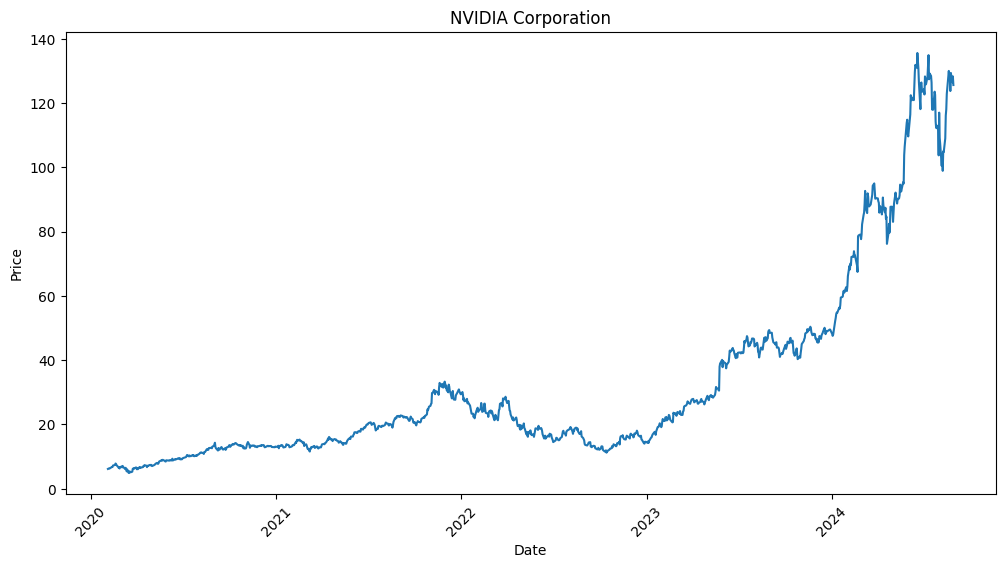

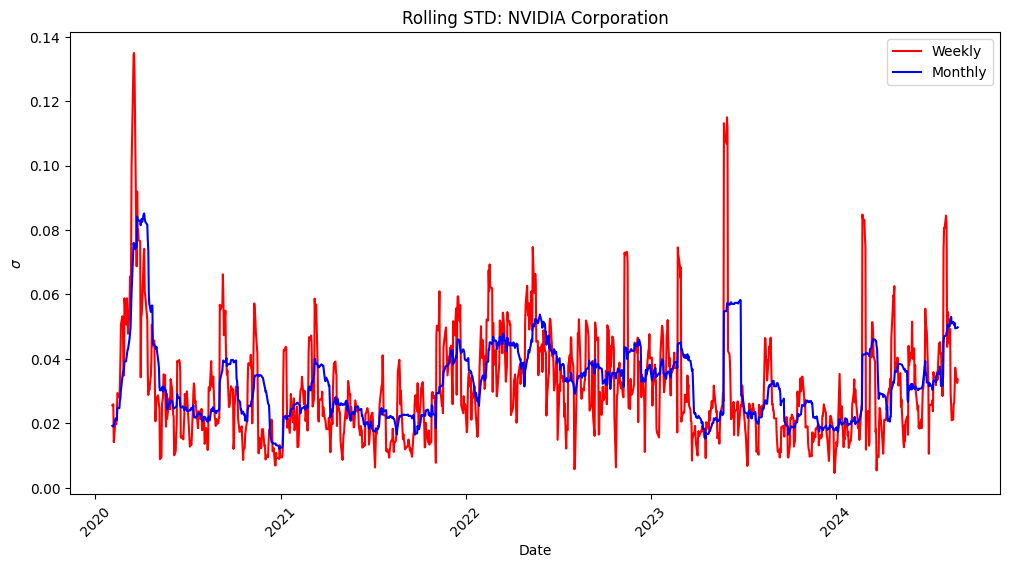

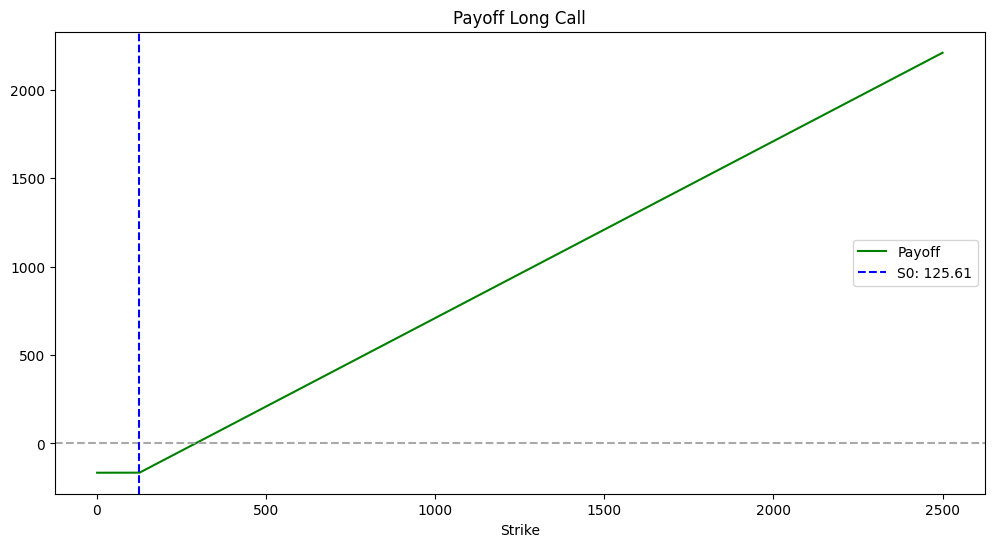

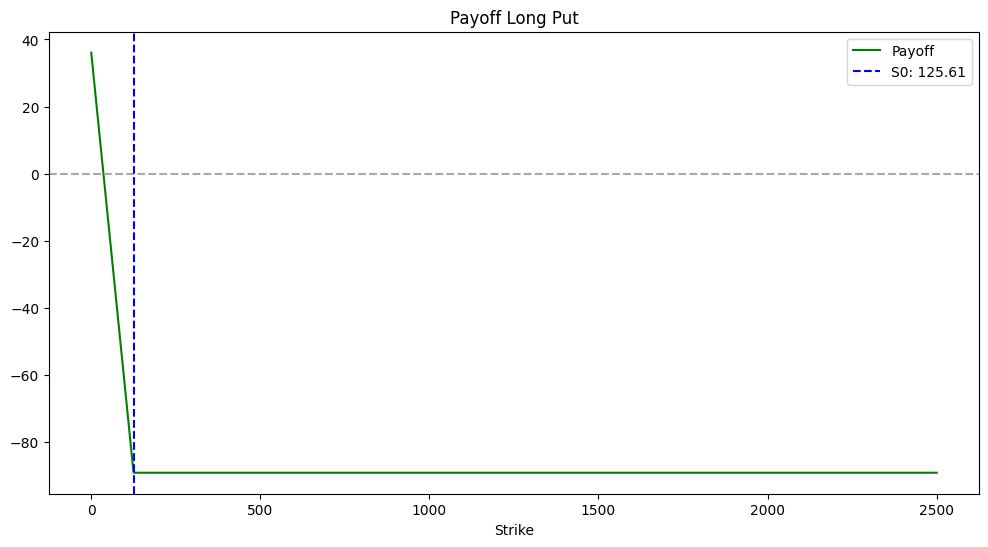

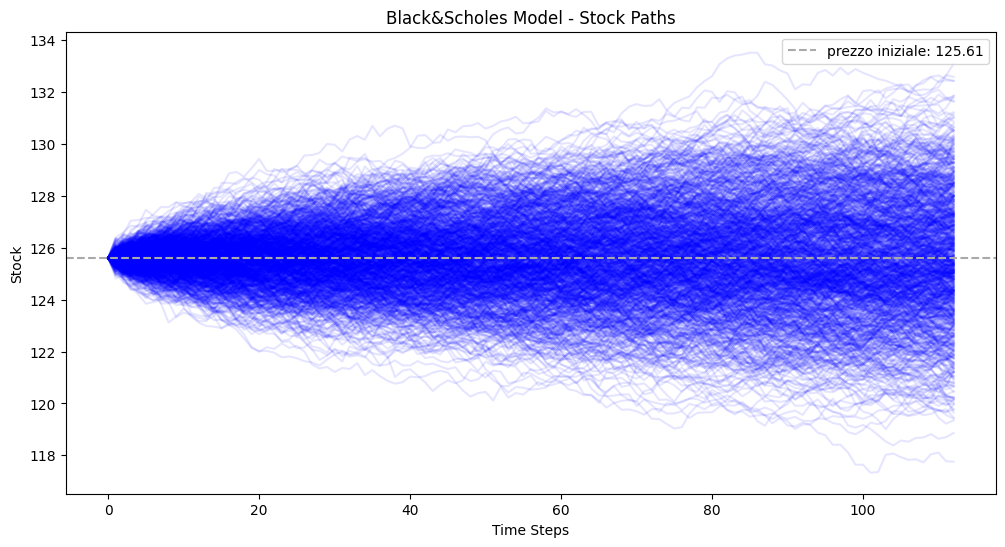

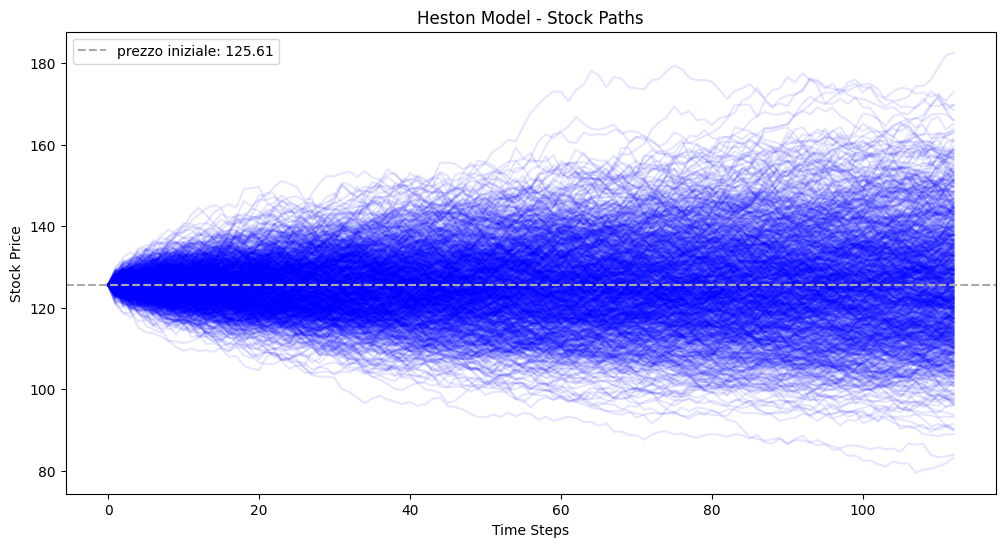


call price and greeks at 76.0 strike: {'Strike': 76.0, 'Price': 49.61, 'ITM': 1.0, 'Delta': 1.0, 'Gamma': 0.0, 'Vanna': 0.0, 'Theta': -0.0, 'Vega': 0.0, 'Volga': 0.0, 'Rho': 23.321}

Implied Volatility for Call Option at 76.0 strike: 0.7682
-----------------------------------------------------------------------------------------------

call price and greeks at 77.0 strike: {'Strike': 77.0, 'Price': 48.61, 'ITM': 1.0, 'Delta': 1.0, 'Gamma': 0.0, 'Vanna': 0.0, 'Theta': -0.0, 'Vega': 0.0, 'Volga': 0.0, 'Rho': 23.627}

Implied Volatility for Call Option at 77.0 strike: 0.8439
-----------------------------------------------------------------------------------------------

call price and greeks at 77.5 strike: {'Strike': 77.5, 'Price': 48.11, 'ITM': 1.0, 'Delta': 1.0, 'Gamma': 0.0, 'Vanna': 0.0, 'Theta': -0.0, 'Vega': 0.0, 'Volga': 0.0, 'Rho': 23.781}

Implied Volatility for Call Option at 77.5 strike: 0.6674
----------------------------------------------------------------------------------

Text(0.5, 1.0, 'Put Implied Volatility')

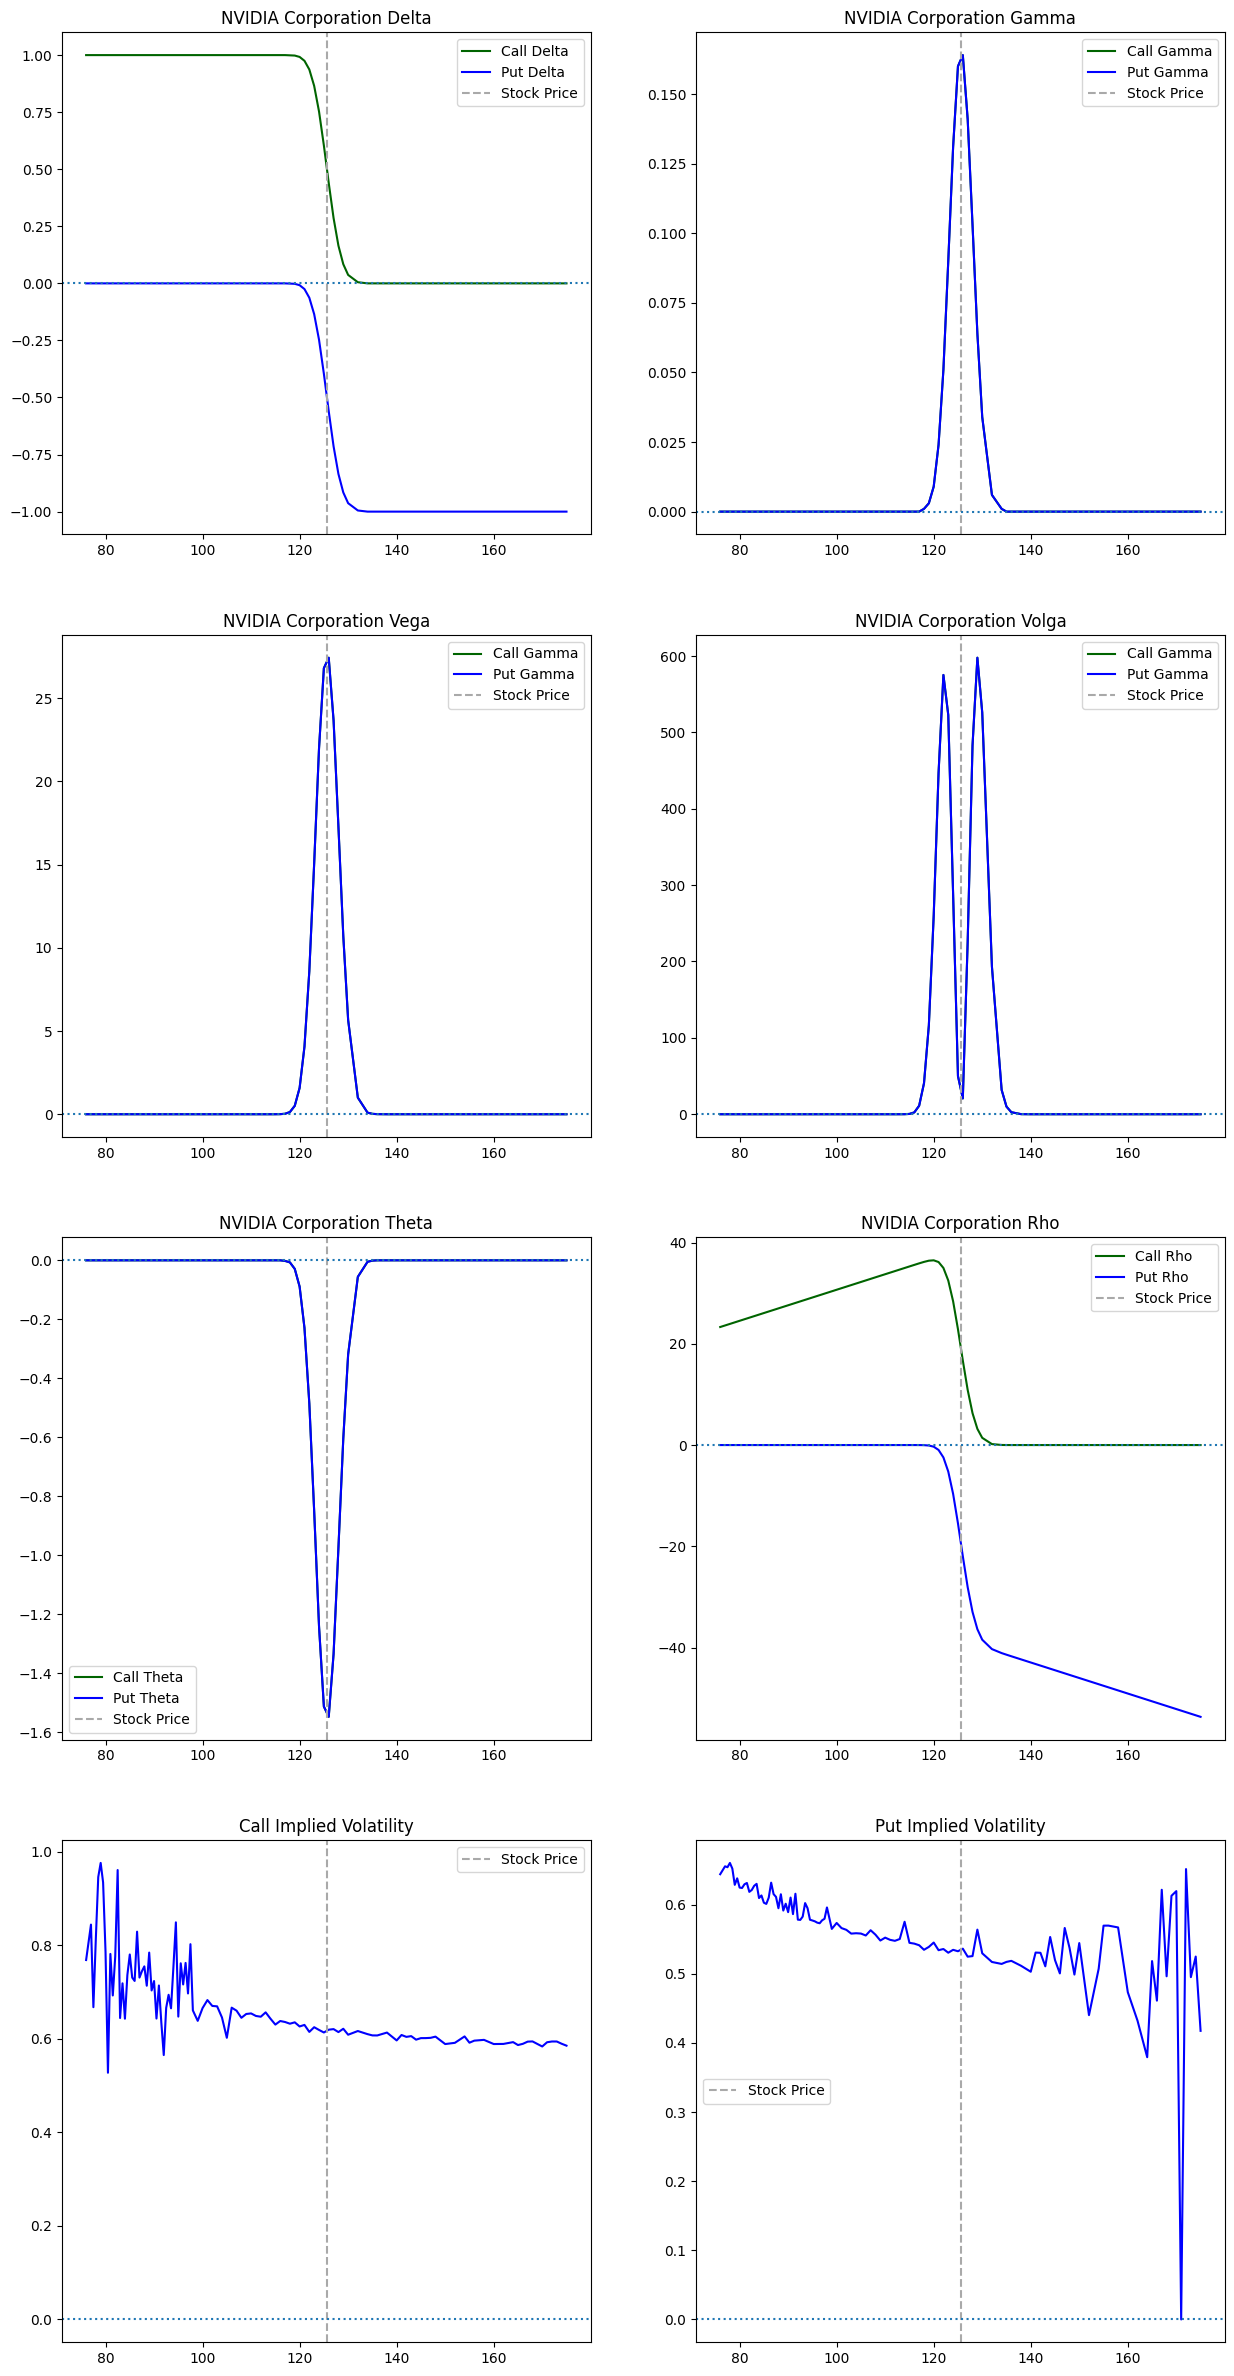

In [36]:
import pandas as pd
import numpy as np
import scipy.stats as si
from scipy.optimize import minimize_scalar, brentq
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import datetime as dt
from statistics import correlation
import warnings
warnings.filterwarnings("ignore")

ticker = "NVDA"
stock = yf.Ticker(ticker)
tick = stock.info

#Get Price
P = yf.download(ticker,datetime(2020,1,1),datetime.now())
# P = pd.read_excel("C:\\Users\\cdecinti\\desktop\\P_adj.xlsx").set_index("Date")


#Calculate Returns
P["Return"] = P["Adj Close"].pct_change().dropna()
P["Weekly Std Return"] = P["Return"].rolling(5).std()              #5 is a trading week
P["Monthly Std Return"] = P["Return"].rolling(22).std()            #22 is a trading month
P = P.dropna()


Ssigma = P["Return"].std()
trend = 0.000
S0 = P["Adj Close"].iloc[-1]
v0 = P["Monthly Std Return"].iloc[-1]
theta = P["Monthly Std Return"].mean()
Vsigma = P["Monthly Std Return"].std()
rho = correlation(P["Adj Close"],P["Monthly Std Return"])

#Parameters of prediction for Stock (AAPL)
T = timeToMaturity/365                             # Time horizon (in year or fraction of years)
N = timeToMaturity                                 # Number of steps (daily)
M = 1000                                # Number of simulations
t = 0.0/365                             # Time at valuation (in year or fraction of years)
r = 0.00                                # Risk-free

#Get Option Chain
exp_date = stock.options
print(exp_date)

#Setting the right expiration date and then download the option chain for example settimn six month to Expiry
expiration_date = datetime(2024,12,20)
timeToMaturity = (expiration_date - datetime.today()).days
# timeToMaturity = 22*6

opt = stock.option_chain(expiration_date.strftime('%Y-%m-%d'))

calls = opt.calls.set_index("contractSymbol")
puts = opt.puts.set_index("contractSymbol")

dist = 50
Kcalls = calls[calls["strike"].apply(lambda x: S0 - dist < x < S0 + dist)]
Kcalls = Kcalls[["strike","lastPrice"]]

Kputs = puts[puts["strike"].apply(lambda x: S0 - dist < x < S0 + dist)]
Kputs = Kputs[["strike","lastPrice"]]

#Plot
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(P["Adj Close"],linewidth=1.5)
plt.title(f"{tick["shortName"]}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

plt.plot(P["Weekly Std Return"],color="red",linewidth = 1.5, label="Weekly")
plt.plot(P["Monthly Std Return"],color = "blue", linewidth = 1.5, label ="Monthly")
plt.xlabel("Date")
plt.ylabel("$\sigma$")
plt.title(f"Rolling STD: {tick["shortName"]}")
plt.legend()
plt.xticks(rotation=45)
plt.show()
#Calculation classic payoff fo call
Value = []
Cpremium = calls["lastPrice"].mean()

for i in range(len(calls)):

    payoffcall = (np.maximum(calls["strike"][i] - S0, 0)) - Cpremium
    payoff = np.sum(pd.Series(payoffcall))

    Value.append(payoff)

#Plot

plt.rcParams['figure.figsize'] = (12,6)
plt.plot(calls["strike"],Value,linestyle = "-",color="green",label="Payoff")
plt.axhline(0,linestyle ="--",color="darkgrey")
plt.axvline(S0,linestyle ="--",color="blue", label=f"S0: {S0:.2f}")
plt.legend()
plt.title("Payoff Long Call")
plt.xlabel("Strike")
plt.show()

#Calculation classic payoff fo put
Value = []
Ppremium = puts["lastPrice"].mean()

for i in range(len(calls)):

    payoffput = (np.maximum(S0 - calls["strike"][i] , 0)) - Ppremium
    payoff = np.sum(pd.Series(payoffput))

    Value.append(payoff)

#Plot

plt.rcParams['figure.figsize'] = (12,6)
plt.plot(calls["strike"],Value,linestyle = "-",color="green",label="Payoff")
plt.axhline(0,linestyle ="--",color="darkgrey")
plt.axvline(S0,linestyle ="--",color="blue",label=f"S0: {S0:.2f}")
plt.legend()
plt.title("Payoff Long Put")
plt.xlabel("Strike")
plt.show()


#Generate Paths
# HWrates = StochasticEquations.hull_white(0.5, 0.013, 0.0491, T, N, M)
# Vrates = StochasticEquations.Vasicek(0.0491, 0.5, 0.0425,0.013, T, N, M)
BSstock = StochasticEquations.BlackScholes(S0, r, Ssigma,trend, T, N, M, False)
Hstock = StochasticEquations.Heston(S0, v0, r, trend, 3, theta, Vsigma, rho, T, N, M, return_vol=False)

#Plot Paths
# StochasticEquations.PlotHWmodel(HWrates)
# StochasticEquations.PlotVmodel(Vrates)
StochasticEquations.PlotBSmodel(BSstock,S0)
StochasticEquations.PlotHmodel(Hstock,S0)

#Calculate the Greeks of a call contract
Cappo = []
Pappo = []
iv_call = []
iv_put = []

for K1,price1 in zip(Kcalls["strike"],Kcalls["lastPrice"]):
    call = StochasticEquations.BlackScholes_opt(S0, K1, Ssigma, T, t, r, "call")
    Cappo.append(call)

    print(f'\ncall price and greeks at {K1} strike: {call}')

    #Calculate IV for Stock price
    iv = StochasticEquations.implied_volatility(S0, K1, T, t, r, price1, option_type='call')
    iv_call.append(iv)

    print(f"\nImplied Volatility for Call Option at {K1} strike: {iv:.4f}")
    print("-----------------------------------------------------------------------------------------------")

for K2,price2 in zip(Kputs["strike"],Kputs["lastPrice"]):
    put = StochasticEquations.BlackScholes_opt(S0, K2, Ssigma, T, t, r, "put")
    Pappo.append(put)

    print(f'\nput price and greeks at {K2} strike: {put}')

    #Calculate IV for Stock price
    iv = StochasticEquations.implied_volatility(S0, K2, T, t, r, price2, option_type='put')
    iv_put.append(iv)

    print(f"Implied Volatility for Put Option at {K2} strike: {iv:.4f}")
    print("-----------------------------------------------------------------------------------------------")

Cgreeks = pd.DataFrame(Cappo)
Pgreeks = pd.DataFrame(Pappo)
iv_call = pd.DataFrame(iv_call)
iv_put = pd.DataFrame(iv_put)

#Plot the Delta graph
plt.rcParams["figure.figsize"] = (15,30)
ax = plt.subplot(4,2,1)
ax.plot(Cgreeks["Strike"],Cgreeks["Delta"], linewidth = 1.5, color="darkgreen", label="Call Delta")
ax.plot(Pgreeks["Strike"],Pgreeks["Delta"], linewidth = 1.5, color="Blue", label="Put Delta")
ax.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax.axhline(0,linestyle="dotted")
ax.legend()
ax.set_title(f"{tick["shortName"]} Delta")

#Plot the Gamma graph
ax2 = plt.subplot(4,2,2)
ax2.plot(Cgreeks["Strike"],Cgreeks["Gamma"], linewidth = 1.5, color="darkgreen", label="Call Gamma")
ax2.plot(Pgreeks["Strike"],Pgreeks["Gamma"], linewidth = 1.5, color="Blue", label="Put Gamma")
ax2.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax2.axhline(0,linestyle="dotted")
ax2.legend()
ax2.set_title(f"{tick["shortName"]} Gamma")

#Plot the Vega graph
ax2 = plt.subplot(4,2,3)
ax2.plot(Cgreeks["Strike"],Cgreeks["Vega"], linewidth = 1.5, color="darkgreen", label="Call Gamma")
ax2.plot(Pgreeks["Strike"],Pgreeks["Vega"], linewidth = 1.5, color="Blue", label="Put Gamma")
ax2.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax2.axhline(0,linestyle="dotted")
ax2.legend()
ax2.set_title(f"{tick["shortName"]} Vega")

#Plot the Volga graph
ax2 = plt.subplot(4,2,4)
ax2.plot(Cgreeks["Strike"],Cgreeks["Volga"], linewidth = 1.5, color="darkgreen", label="Call Gamma")
ax2.plot(Pgreeks["Strike"],Pgreeks["Volga"], linewidth = 1.5, color="Blue", label="Put Gamma")
ax2.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax2.axhline(0,linestyle="dotted")
ax2.legend()
ax2.set_title(f"{tick["shortName"]} Volga")

#Plot the Theta graph
ax3 = plt.subplot(4,2,5)
ax3.plot(Cgreeks["Strike"],Cgreeks["Theta"], linewidth = 1.5, color="darkgreen", label="Call Theta")
ax3.plot(Pgreeks["Strike"],Pgreeks["Theta"], linewidth = 1.5, color="Blue", label="Put Theta")
ax3.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax3.axhline(0,linestyle="dotted")
ax3.legend()
ax3.set_title(f"{tick["shortName"]} Theta")

#Plot the Theta graph
ax4 = plt.subplot(4,2,6)
ax4.plot(Cgreeks["Strike"],Cgreeks["Rho"], linewidth = 1.5, color="darkgreen", label="Call Rho")
ax4.plot(Pgreeks["Strike"],Pgreeks["Rho"], linewidth = 1.5, color="blue", label="Put Rho")
ax4.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax4.axhline(0,linestyle="dotted")
ax4.legend()
ax4.set_title(f"{tick["shortName"]} Rho")

#Plot Iv Call
ax5 = plt.subplot(4,2,7)
ax5.plot(Cgreeks["Strike"],iv_call, linewidth = 1.5, color="blue")
ax5.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax5.axhline(0,linestyle="dotted")
ax5.legend()
ax5.set_title("Call Implied Volatility")

#Plot Iv Put
ax6 = plt.subplot(4,2,8)
ax6.plot(Pgreeks["Strike"],iv_put, linewidth = 1.5, color="blue")
ax6.axvline(S0,color="darkgrey",linestyle="--", label="Stock Price")
ax6.axhline(0,linestyle="dotted")
ax6.legend()
ax6.set_title("Put Implied Volatility")

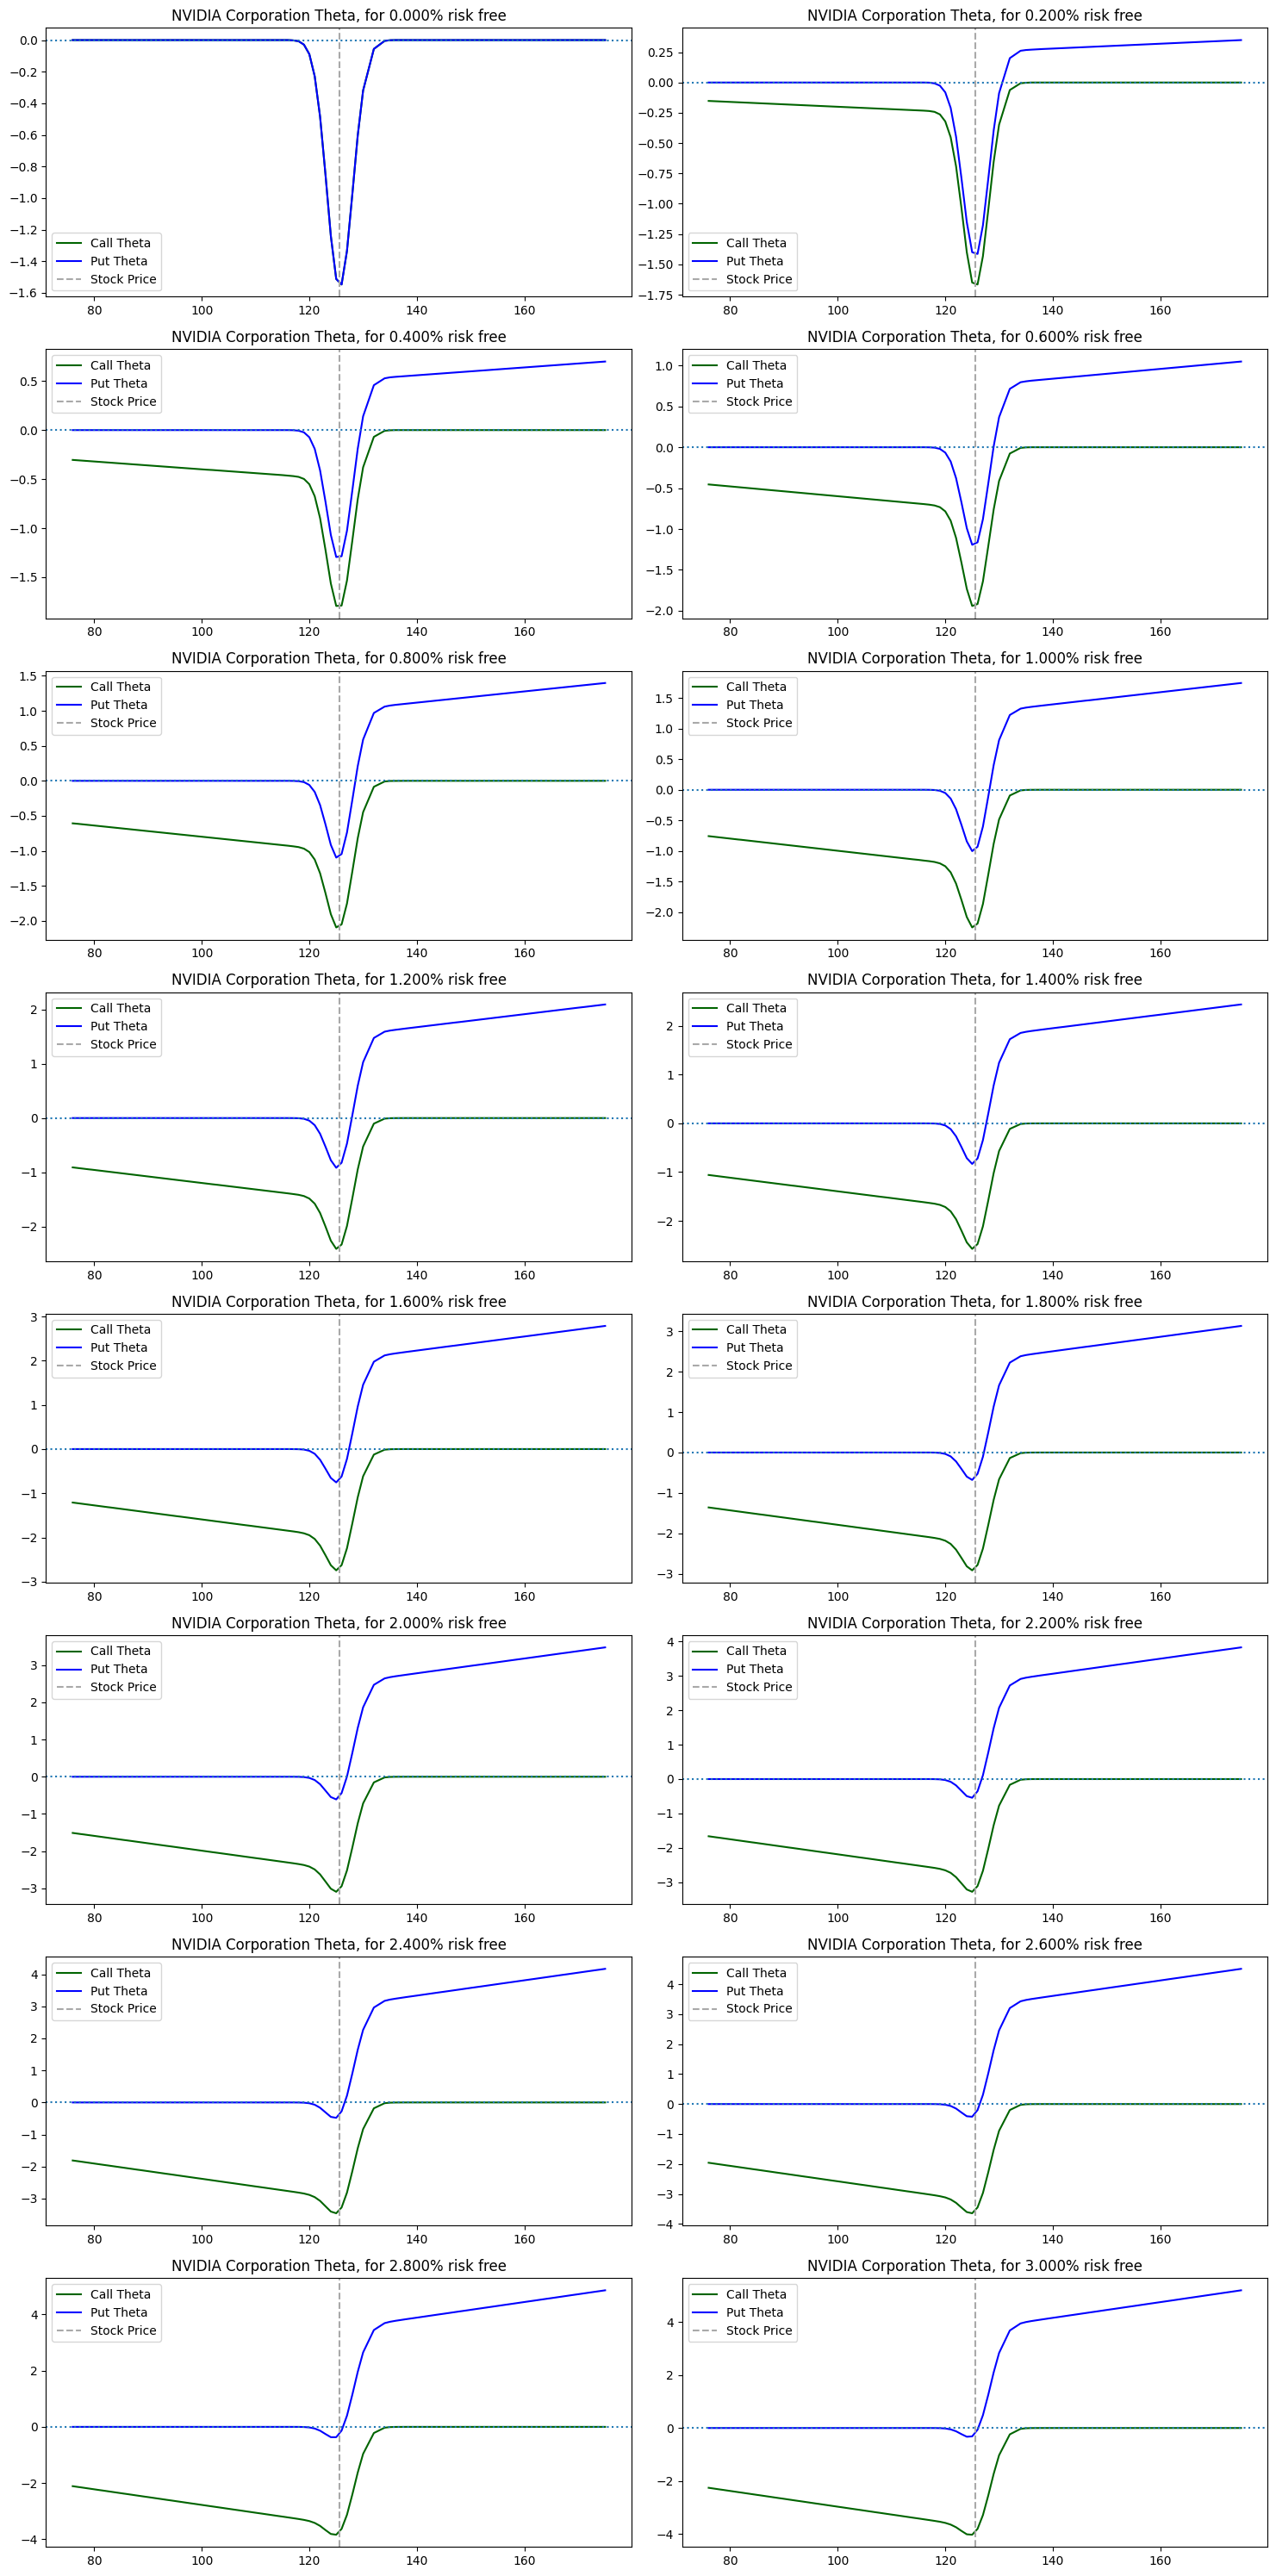

In [39]:
#Breakdown theta
#Two components affect the PDE of theta parameters (time decay factor that means: when time tends to expiry, the price of the option decrease):
#First: Underlying price (S0) has a negative impact on option price due to the decrease of time value of the option;
#Second: The risk free rate (r) that has a postive impact on option price.

#Let's consider different Risk free rate to evaluate how theta change in risk free changes.

rs = np.linspace(0, 0.03, 16)

fig, axes = plt.subplots(8, 2, figsize=(15, 30))

for i, ri in enumerate(rs):
    Cappo = []
    Pappo = []

    for K1, price1 in zip(Kcalls["strike"], Kcalls["lastPrice"]):
        call = StochasticEquations.BlackScholes_opt(S0, K1, Ssigma, T, t, ri, "call")
        Cappo.append(call)

    for K2, price2 in zip(Kputs["strike"], Kputs["lastPrice"]):
        put = StochasticEquations.BlackScholes_opt(S0, K2, Ssigma, T, t, ri, "put")
        Pappo.append(put)

    Cgreeks = pd.DataFrame(Cappo)
    Pgreeks = pd.DataFrame(Pappo)

    ax = axes[i // 2, i % 2]
    ax.plot(Cgreeks["Strike"], Cgreeks["Theta"], linewidth=1.5, color="darkgreen", label="Call Theta")
    ax.plot(Pgreeks["Strike"], Pgreeks["Theta"], linewidth=1.5, color="blue", label="Put Theta")
    ax.axvline(S0, color="darkgrey", linestyle="--", label="Stock Price")
    ax.axhline(0, linestyle="dotted")
    ax.legend()
    ax.set_title(f"{tick['shortName']} Theta, for {ri:.3%} risk free")

plt.tight_layout()
plt.show()

